In [40]:
import numpy as np
import pandas as pd

In [41]:
x = np.random.randint(0, 10_000, size= 100_000)
x = pd.Series(x)
x.head()

0    4432
1    6246
2    8434
3     570
4    7735
dtype: int64

<AxesSubplot:>

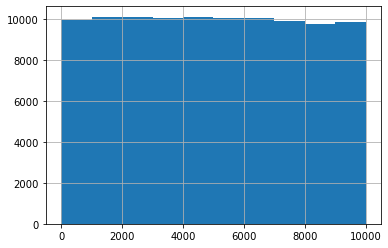

In [42]:
x.hist()

In [43]:
averages = []
for i in range(1000):
    sample = x.sample(50)
    averages.append(sample.mean())

averages = pd.Series(averages)

In [44]:
# What is the mean of the sample means?
averages.mean()

4975.252600000012

In [45]:
# What is the population mean? 
x.mean()

4979.26493

<AxesSubplot:>

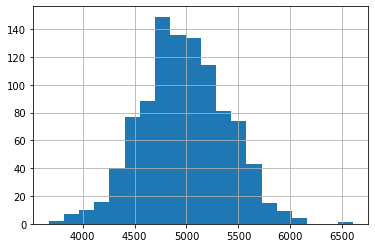

In [46]:
averages.hist(bins = 20)

In [47]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [48]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

# read Iris data from pydatset
df = data('iris')

# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [49]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [50]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species

# Train Model



In [51]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [52]:
# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [53]:
print(rf.feature_importances_)

[0.08209193 0.02845967 0.47781398 0.41163442]


In [54]:
# Make Predictions
y_pred = rf.predict(X_train)

In [55]:
# Estimate Probability
y_pred_proba = rf.predict_proba(X_train)

# Evaluate Model

In [56]:
# Compute the Accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.98


In [57]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[28  0  0]
 [ 0 26  2]
 [ 0  0 28]]


In [58]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      0.93      0.96        28
   virginica       0.93      1.00      0.97        28

    accuracy                           0.98        84
   macro avg       0.98      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84



# Validate Model

In [59]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.97


In [60]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [61]:
# Exercises
# Continue working in your model file with titanic data to do the following: 
import aquire
import prepare
df = aquire.get_titanic_data()
df = df.drop(columns='deck')
df = df[~ df.age.isna()]
df = df[~ df.embarked.isna()]
df = df.drop(columns=['embarked', 'class', 'passenger_id', 'age'])
df.head() 

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [62]:
df["is_female"] = df.sex == 1

In [63]:
dummy_df = pd.get_dummies(df[["embark_town"]], drop_first=True)
dummy_df

,embark_town_Queenstown,embark_town_Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [64]:
df = pd.concat([df, dummy_df], axis=1)

In [65]:
df = df.drop(columns=['sex', 'embark_town'])
df.head()

,survived,pclass,sibsp,parch,fare,alone,is_female,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,False,0,1
1,1,1,1,0,71.2833,0,False,0,0
2,1,3,0,0,7.9250,1,False,0,1
3,1,1,1,0,53.1000,0,False,0,1
4,0,3,0,0,8.0500,1,False,0,1


In [66]:
train, validate, test = train_validate_test_split(df, target = 'survived')
train.head()

,survived,pclass,sibsp,parch,fare,alone,is_female,embark_town_Queenstown,embark_town_Southampton
450,0,2,1,2,27.75,0,False,0,1
543,1,2,1,0,26.00,0,False,0,1
157,0,3,0,0,8.05,1,False,0,1
462,0,1,0,0,38.50,1,False,0,1
397,0,2,0,0,26.00,1,False,0,1


In [67]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [108]:
# 1) Fit the Random Forest classifier to your training sample and transform 
# (i.e. make predictions on the training sample) setting the random_state accordingly and 
# setting min_samples_leaf = 1 and max_depth = 10.

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [109]:
print(rf.feature_importances_)

[0.15342129 0.06762078 0.09052746 0.58853493 0.03035064 0.
 0.02237118 0.04717372]


In [110]:
# Make Predictions
y_pred = rf.predict(X_train)

In [111]:
# Estimate Probability
y_pred_proba = rf.predict_proba(X_train)

In [112]:
# 2) Evaluate your results using the model score, confusion matrix, and classification report.

# Compute the Accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.87


In [113]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[216  21]
 [ 32 129]]


In [114]:
 print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       237
           1       0.86      0.80      0.83       161

    accuracy                           0.87       398
   macro avg       0.87      0.86      0.86       398
weighted avg       0.87      0.87      0.87       398



In [115]:
# 3) Print and clearly label the following: Accuracy, true positive rate, false positive rate, 
# true negative rate, false negative rate, precision, recall, f1-score, and support.
import pandas as pd
report = classification_report(y_train, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.870968,0.860000,0.866834,0.865484,0.866531
recall,0.911392,0.801242,0.866834,0.856317,0.866834
f1-score,0.890722,0.829582,0.866834,0.860152,0.865989
support,237.000000,161.000000,0.866834,398.000000,398.000000


In [116]:
# 4) Run through steps increasing your min_samples_leaf and decreasing your max_depth.
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=4,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [117]:
print(rf.feature_importances_)

[0.15342129 0.06762078 0.09052746 0.58853493 0.03035064 0.
 0.02237118 0.04717372]


In [118]:
# Make Predictions
y_pred = rf.predict(X_train)

In [119]:
# Estimate Probability
y_pred_proba = rf.predict_proba(X_train)

In [120]:
# Compute the Accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.87


In [121]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[216  21]
 [ 32 129]]


In [122]:
 print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       237
           1       0.86      0.80      0.83       161

    accuracy                           0.87       398
   macro avg       0.87      0.86      0.86       398
weighted avg       0.87      0.87      0.87       398



In [123]:
import pandas as pd
report = classification_report(y_train, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.870968,0.860000,0.866834,0.865484,0.866531
recall,0.911392,0.801242,0.866834,0.856317,0.866834
f1-score,0.890722,0.829582,0.866834,0.860152,0.865989
support,237.000000,161.000000,0.866834,398.000000,398.000000


In [129]:
# out of sample data
y_val_pred_1 = rf.predict(validate.drop(columns='survived'))
y_val_pred_2 = rf2.predict(validate.drop(columns='survived'))

In [130]:
# get validation accuracy
accuracy_v_1 = rf.score(validate.drop(columns='survived'), validate.survived)
accuracy_v_2 = rf2.score(validate.drop(columns='survived'), validate.survived)

In [131]:
accuracy_v_1

0.6549707602339181

In [132]:
accuracy_v_2

0.6783625730994152

In [136]:
# 5) What are the differences in the evaluation metrics? Which performs better on your 
# in-sample data? Why?
def get_metrics_binary(rf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    accuracy = rf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report
    


In [137]:
report = get_metrics_binary(rf)


    The accuracy for our model is 0.8668
    The True Positive Rate is 0.801, The False Positive Rate is 0.0886,
    The True Negative Rate is 0.911, and the False Negative Rate is 0.199
    


In [138]:
rf2.fit(X_train, y_train)
report2 = get_metrics_binary(rf2)


    The accuracy for our model is 0.7261
    The True Positive Rate is 0.801, The False Positive Rate is 0.0886,
    The True Negative Rate is 0.911, and the False Negative Rate is 0.199
    


In [39]:
# After making a few models, which one has the best performance 
# (or closest metrics) on both train and validate?

#report2 has the closest metrics. rf Model1 seems to be over fit.